In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
train= pd.read_csv("domaci1_data/train.csv")
test= pd.read_csv("domaci1_data/test.csv")
real= pd.read_csv("domaci1_data/sample_submission.csv")

In [3]:
plt.style.use(style="ggplot")
plt.rcParams['figure.figsize']=(10,6)

In [4]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew  1.8828757597682129


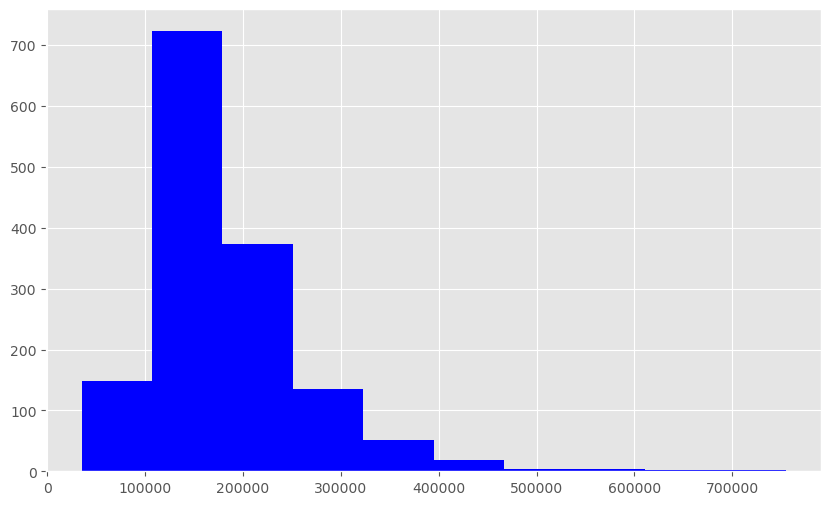

In [5]:
print("Skew ",train.SalePrice.skew())
plt.hist(train.SalePrice, color="blue")
plt.show()

Skew:  0.12133506220520406


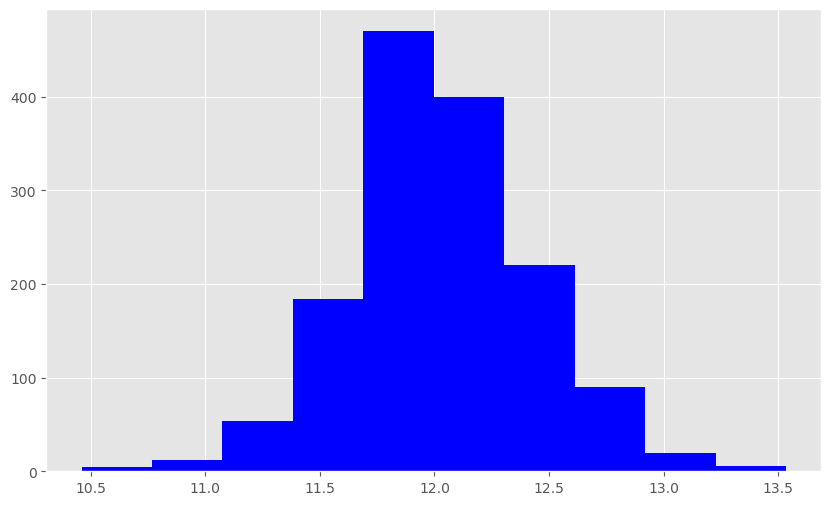

In [6]:
# logaritmovanje funkcije kako bi bila bolji gaus radi linearnosti
target=np.log(train.SalePrice)
print("Skew: ", target.skew())
plt.hist(target, color="blue")
plt.show()

In [7]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
high_corr_features = corr['SalePrice'][corr['SalePrice'] > 0.5].sort_values(ascending=False)

for feature, correlation in high_corr_features.items():
    print(f"{feature}: {correlation}")
    

SalePrice: 1.0
OverallQual: 0.7909816005838053
GrLivArea: 0.7086244776126515
GarageCars: 0.6404091972583519
GarageArea: 0.6234314389183622
TotalBsmtSF: 0.6135805515591943
1stFlrSF: 0.6058521846919153
FullBath: 0.5606637627484453
TotRmsAbvGrd: 0.5337231555820284
YearBuilt: 0.5228973328794967
YearRemodAdd: 0.5071009671113866


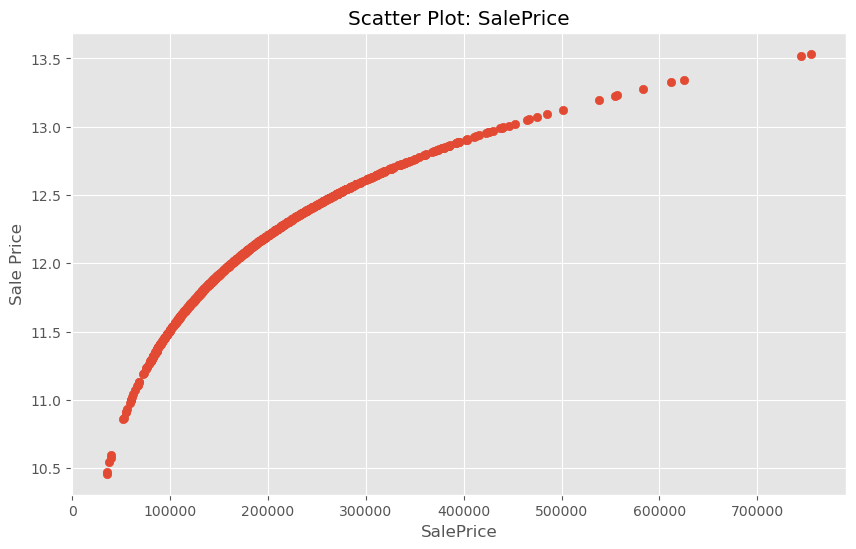

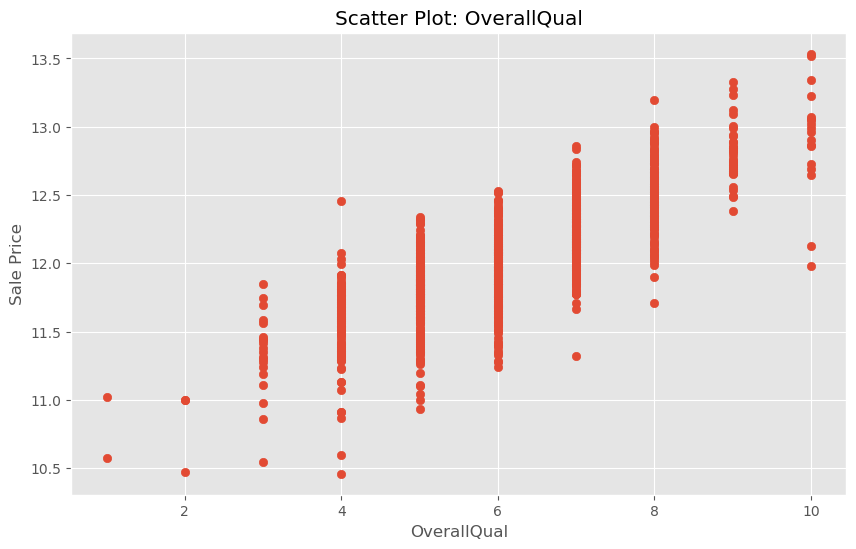

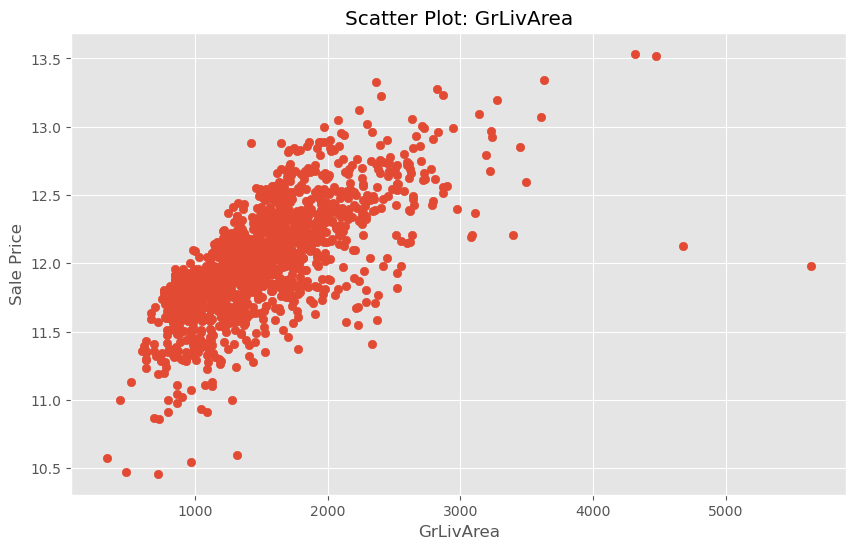

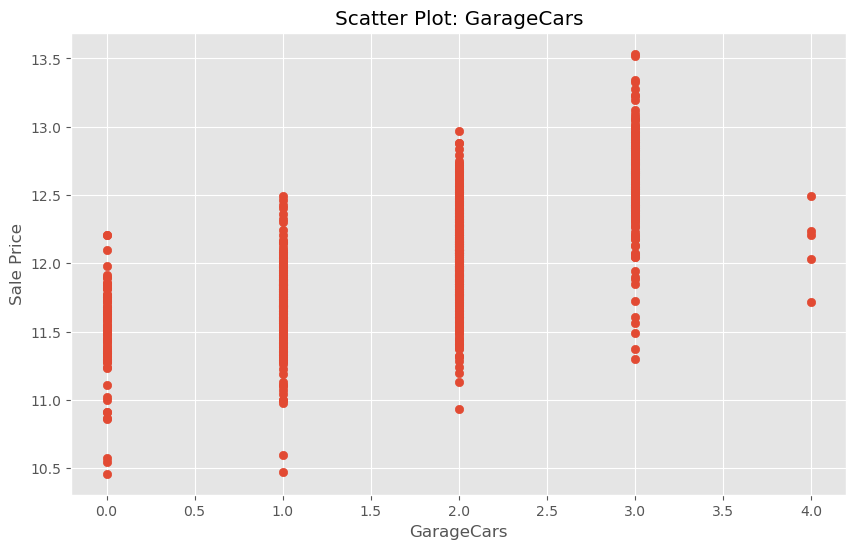

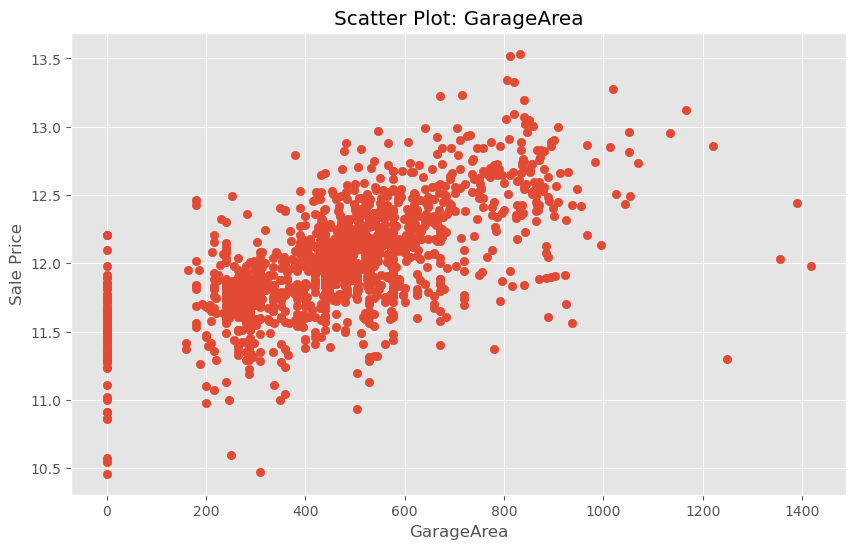

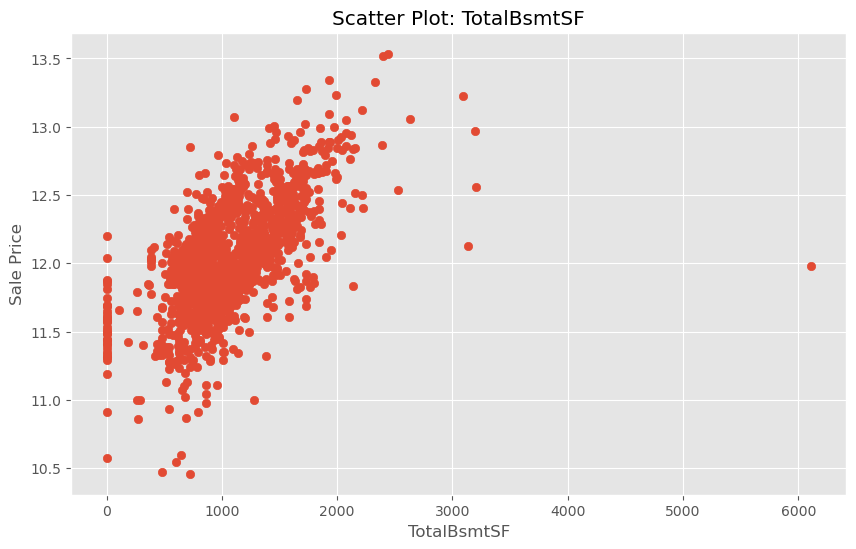

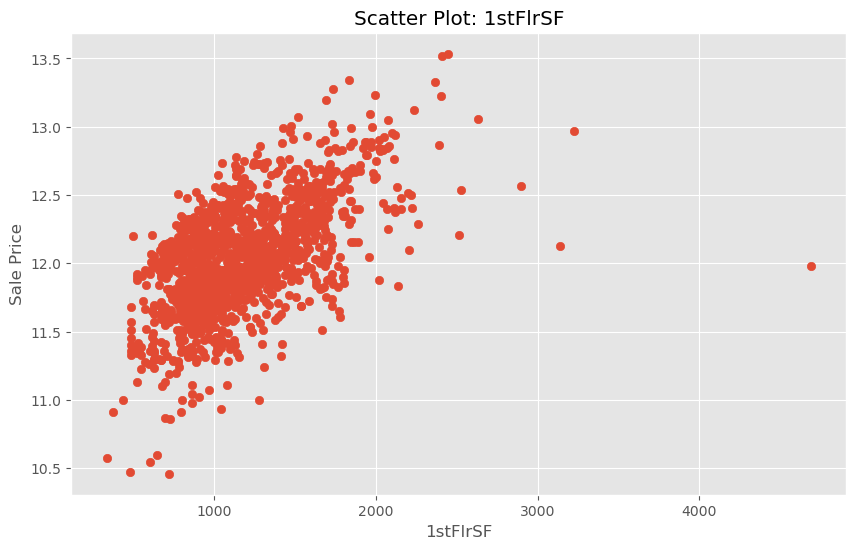

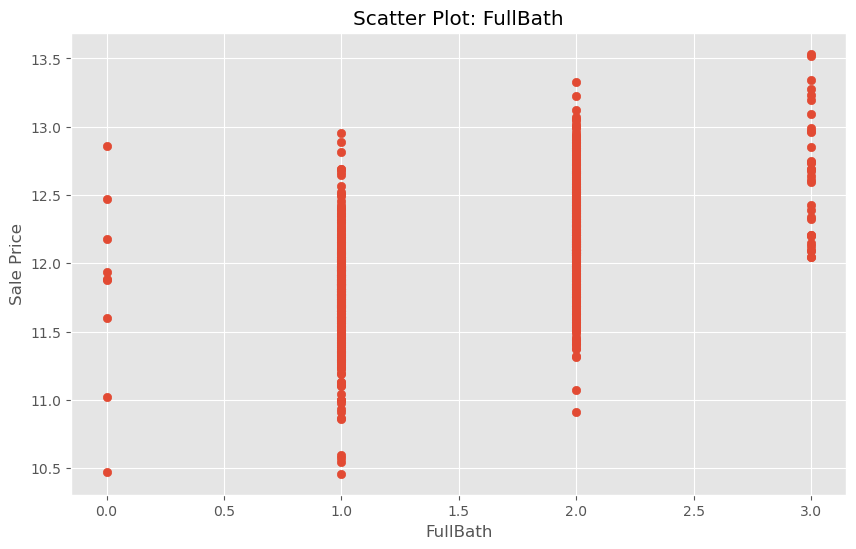

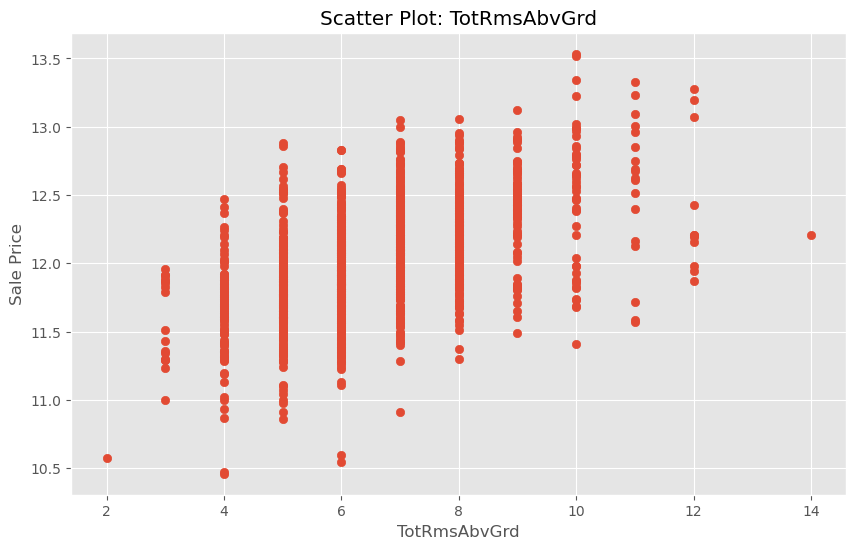

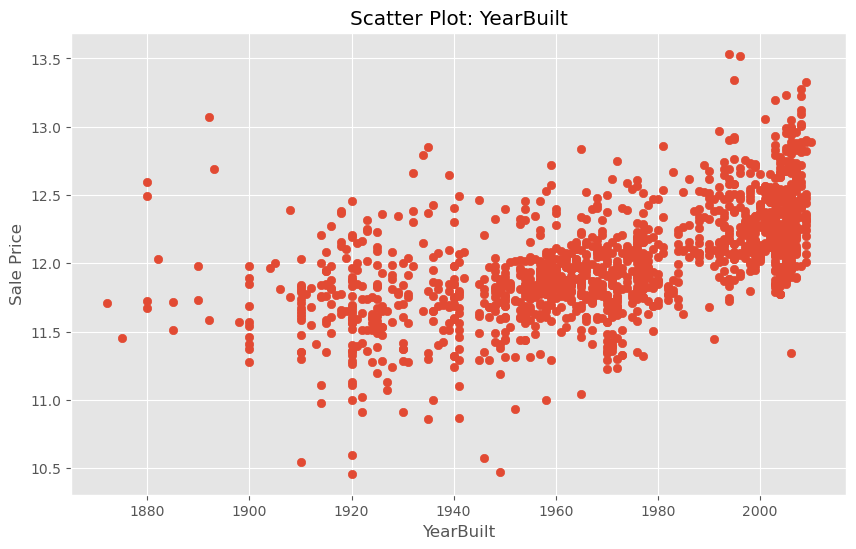

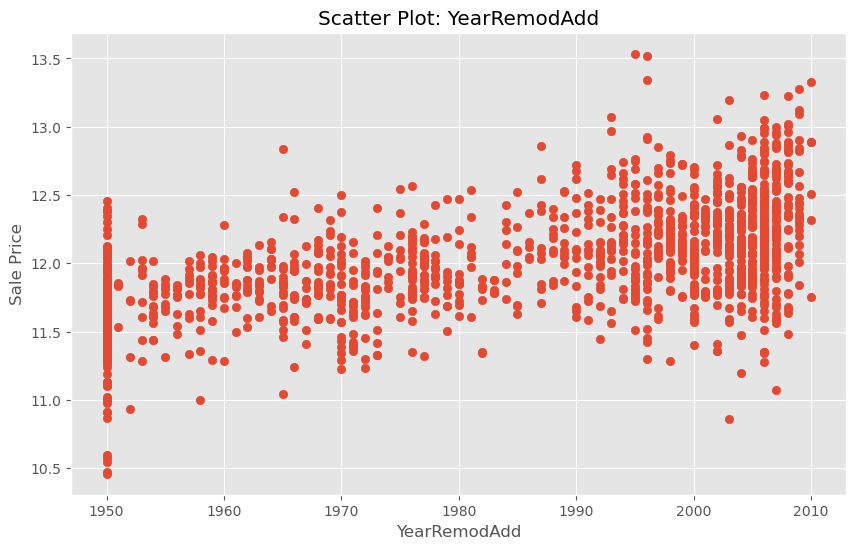

In [8]:
top_features = corr['SalePrice'][corr['SalePrice'] >= 0.5].sort_values(ascending=False).index

for feature in top_features:
    plt.scatter(x=train[feature], y=target)
    plt.ylabel("Sale Price")
    plt.xlabel(feature)
    plt.title(f"Scatter Plot: {feature}")
    plt.show()


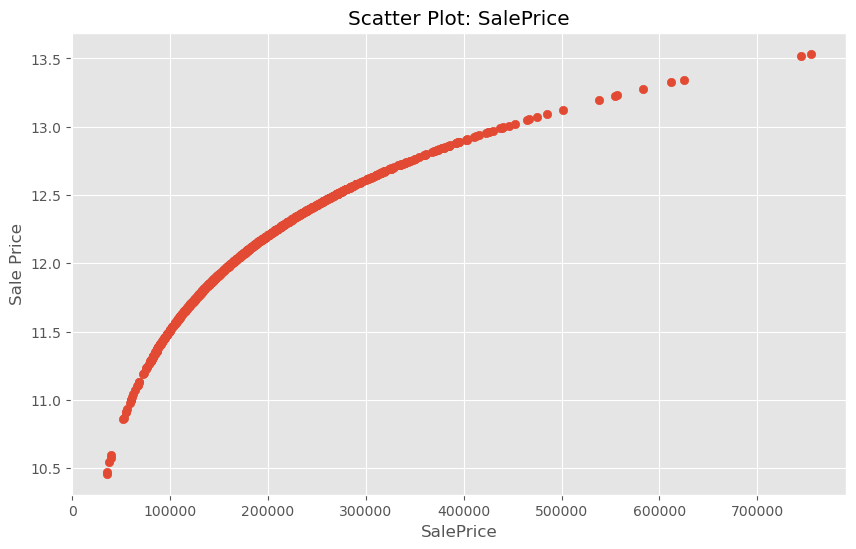

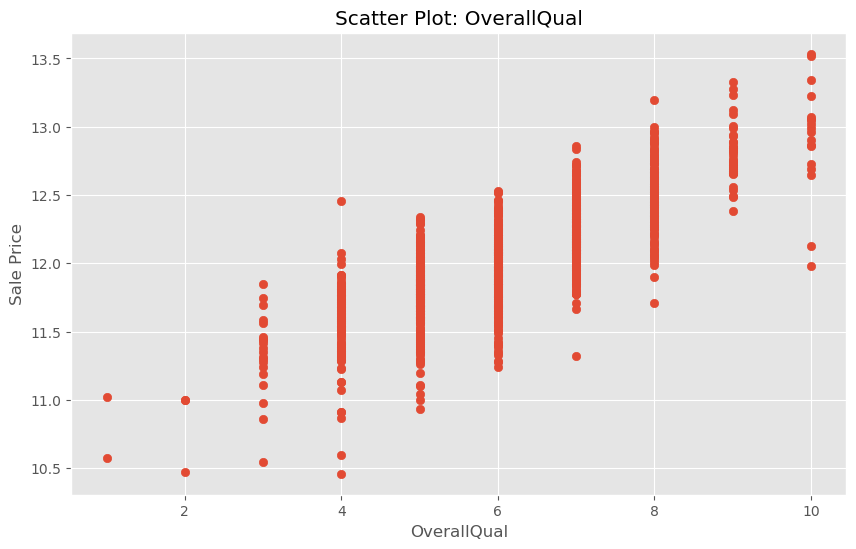

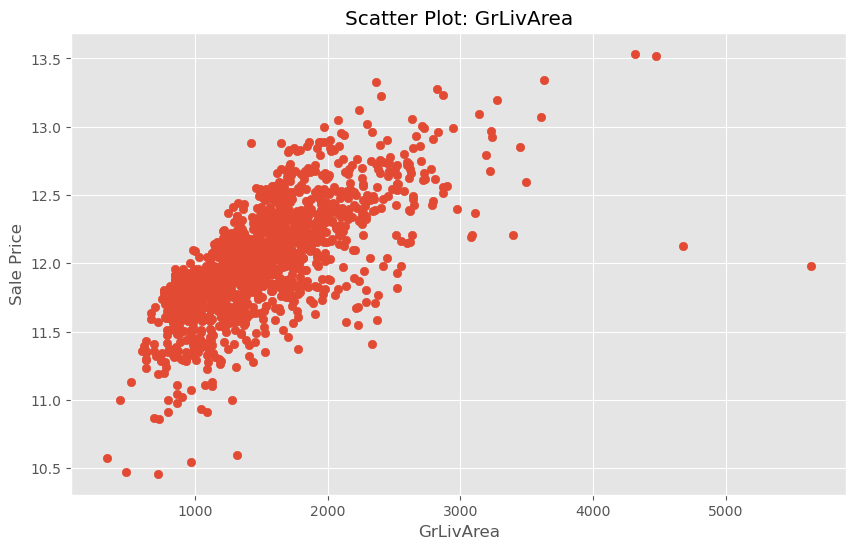

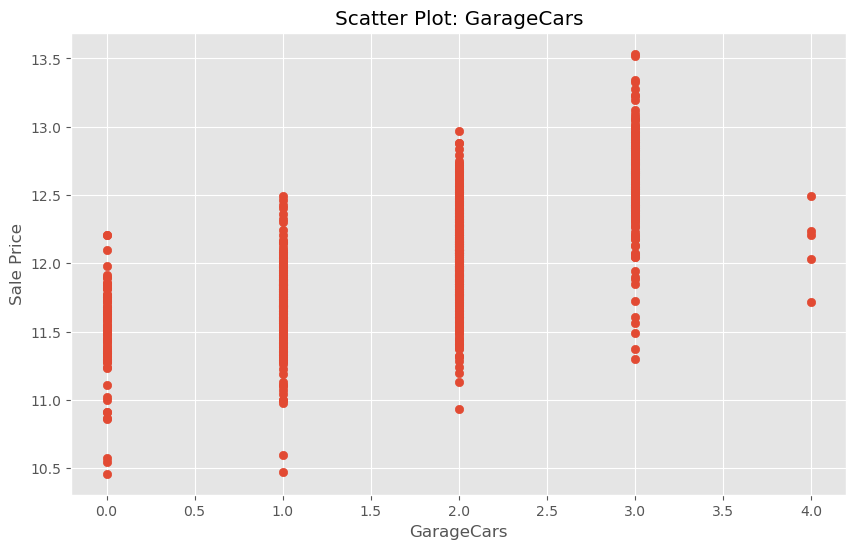

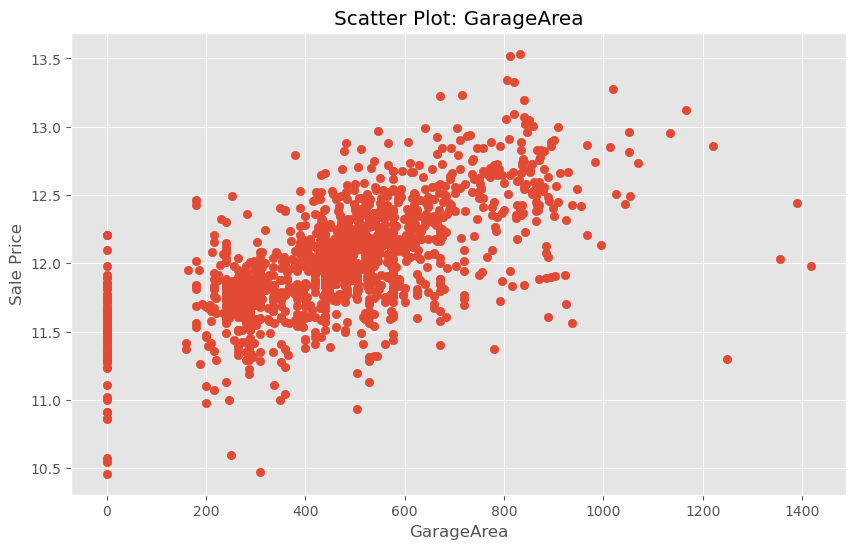

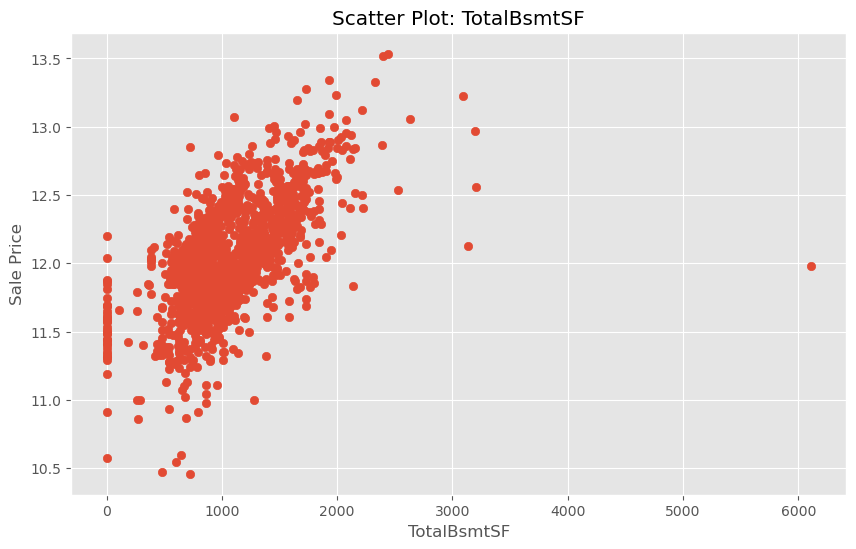

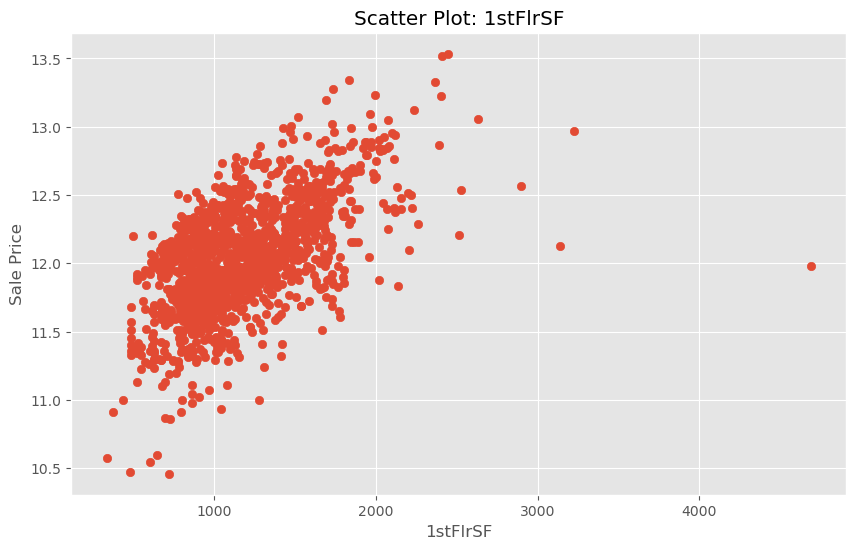

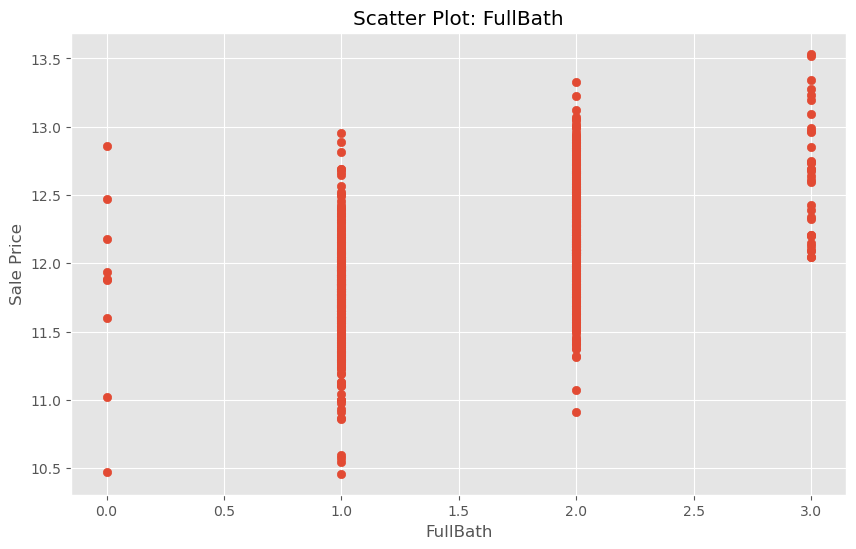

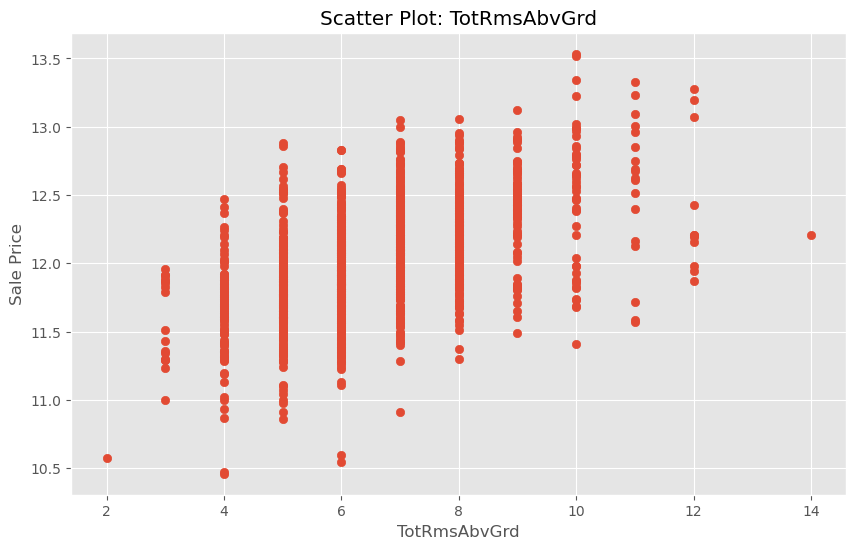

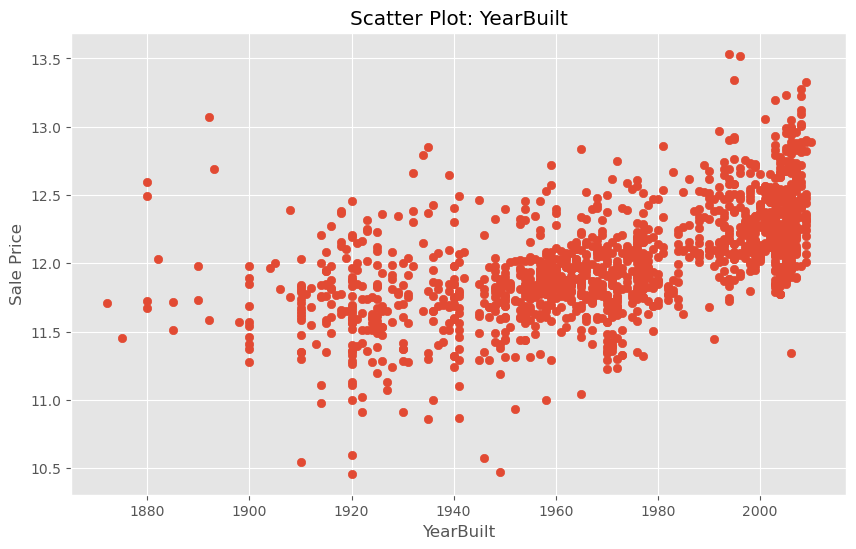

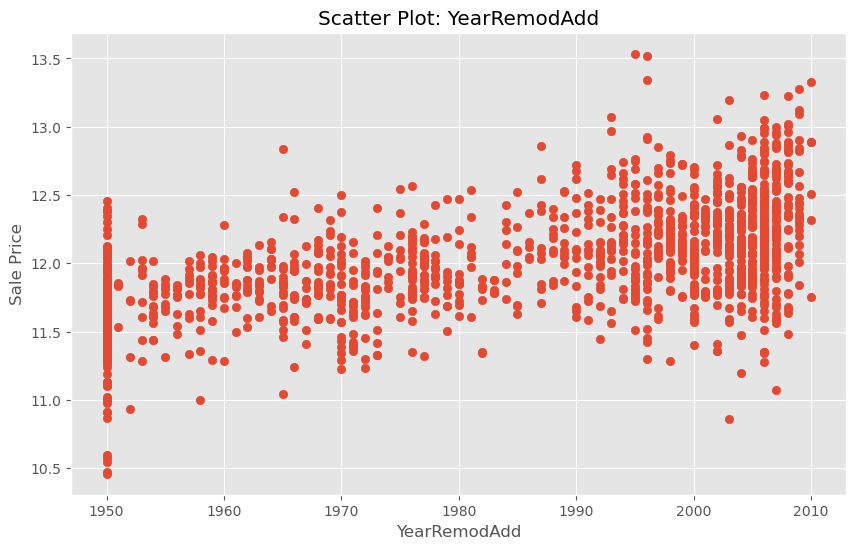

In [9]:
top_features = corr['SalePrice'][corr['SalePrice'] >= 0.5].sort_values(ascending=False).index

for feature in top_features:
    plt.scatter(x=train[feature], y=target)
    plt.ylabel("Sale Price")
    plt.xlabel(feature)
    plt.title(f"Scatter Plot: {feature}")
    plt.show()

In [10]:
very_low_corr_features = corr['SalePrice'][corr['SalePrice'] < -0.1]

for feature, correlation in very_low_corr_features.items():
    print(f"{feature}: {correlation}")
    

KitchenAbvGr: -0.13590737084214105
EnclosedPorch: -0.1285779579259566


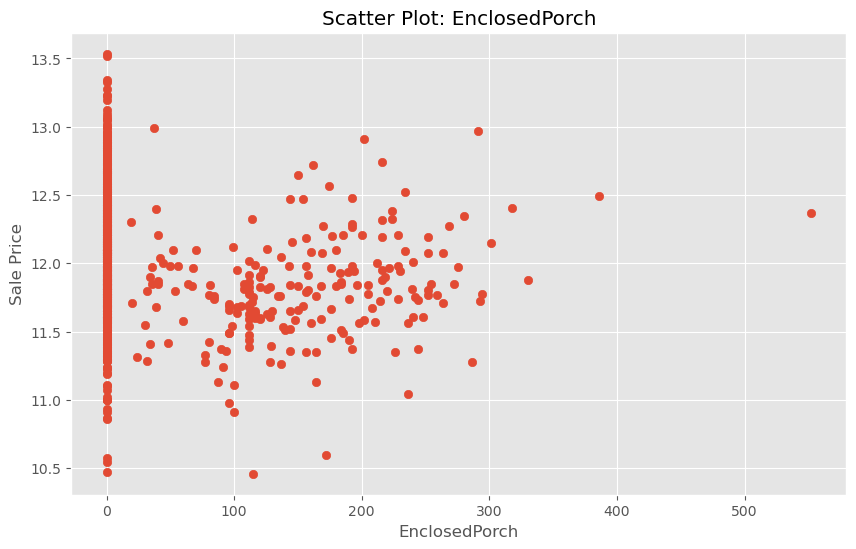

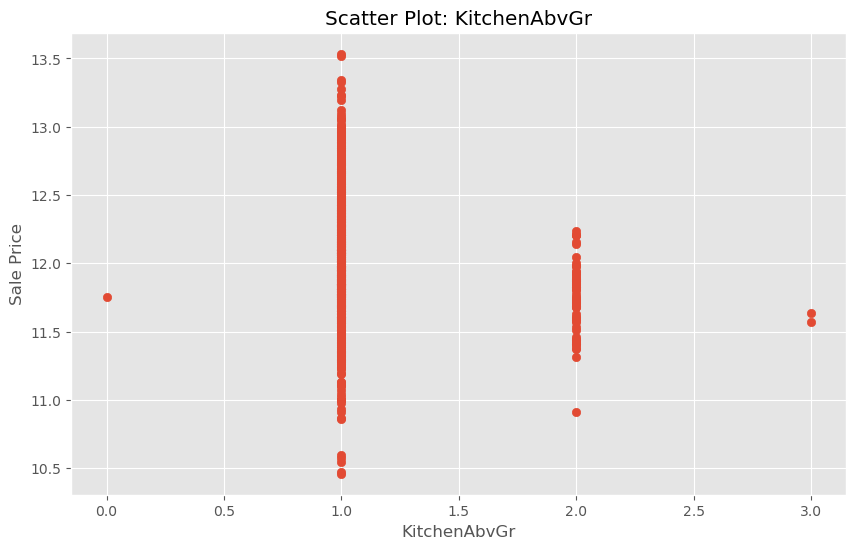

In [11]:
low_features = corr['SalePrice'][corr['SalePrice'] < -0.1].sort_values(ascending=False).index

for feature in low_features:
    plt.scatter(x=train[feature], y=target)
    plt.ylabel("Sale Price")
    plt.xlabel(feature)
    plt.title(f"Scatter Plot: {feature}")
    plt.show()

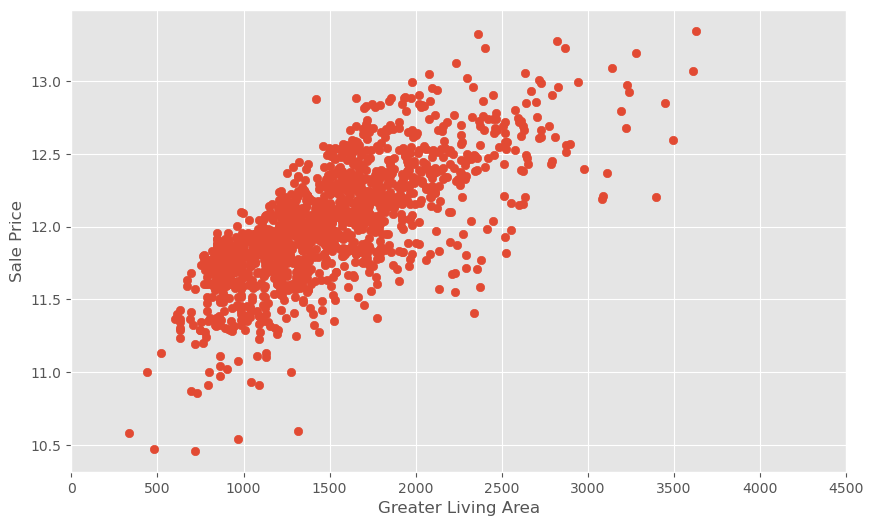

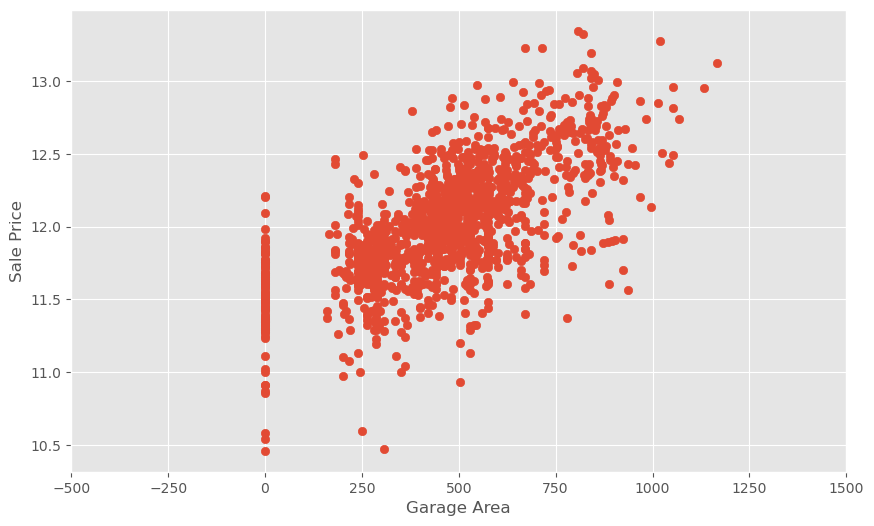

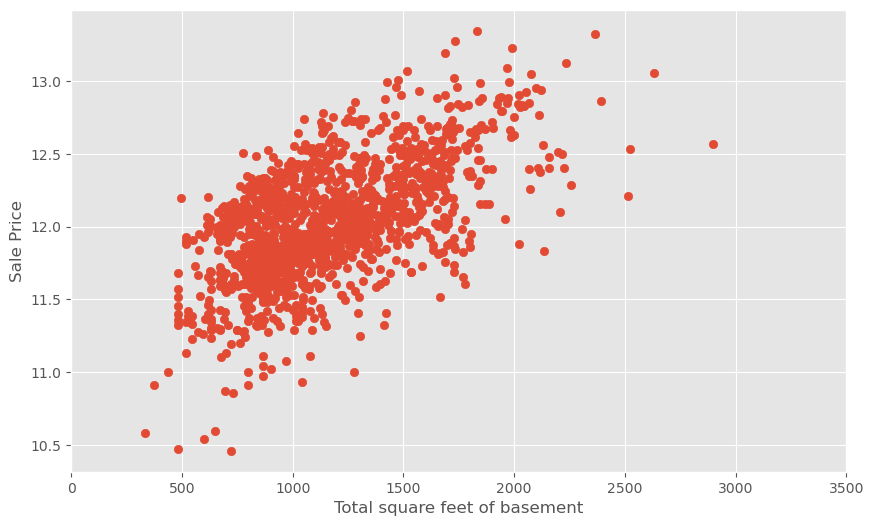

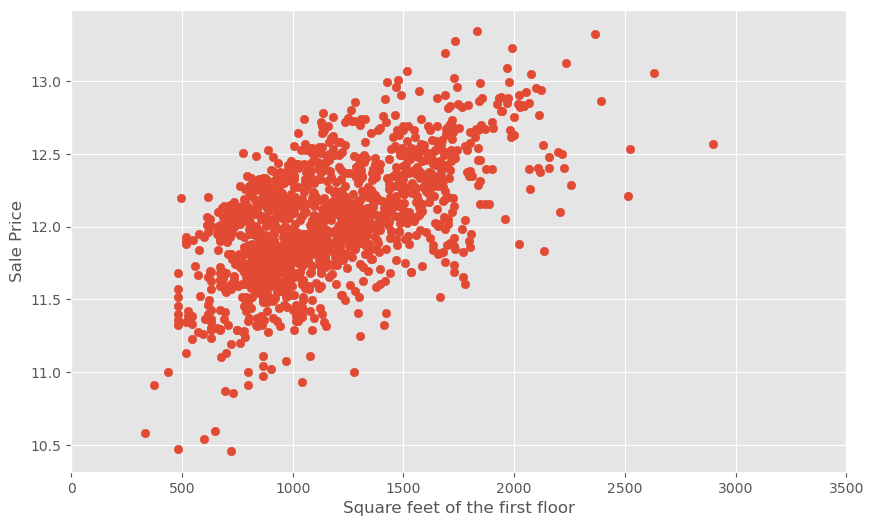

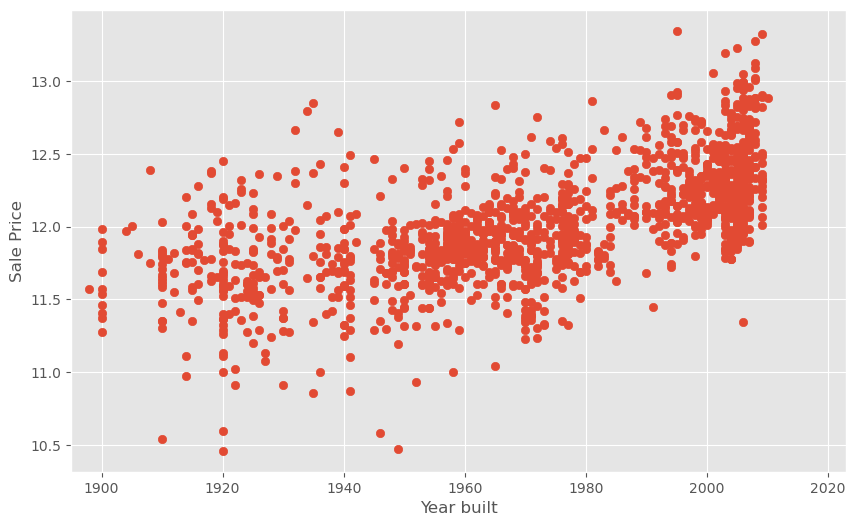

In [12]:
#sve vrednosti koje imaju korelaciju preko 0.5 sa finalnom cenom smo smatrali kao signifikantne. Ako je u njima bilo izuzetaka, koje bi mogle poremetiti
#nas model onda bismo ih uklonili. 
train=train[train["GrLivArea"]<4000]
plt.scatter(x=train["GrLivArea"], y=np.log(train.SalePrice))
plt.xlim(0,4500)
plt.ylabel("Sale Price")
plt.xlabel("Greater Living Area")
plt.show()

train=train[train["GarageArea"]<1200]
plt.scatter(x=train["GarageArea"], y=np.log(train.SalePrice))
plt.xlim(-500,1500)
plt.ylabel("Sale Price")
plt.xlabel("Garage Area")
plt.show()

train=train[train["TotalBsmtSF"]<3000]
plt.scatter(x=train["1stFlrSF"], y=np.log(train.SalePrice))
plt.xlim(0,3500)
plt.ylabel("Sale Price")
plt.xlabel("Total square feet of basement")
plt.show()

train=train[train["1stFlrSF"]<3000]
plt.scatter(x=train["1stFlrSF"], y=np.log(train.SalePrice))
plt.xlim(0,3500)
plt.ylabel("Sale Price")
plt.xlabel("Square feet of the first floor")
plt.show()

train=train[train["YearBuilt"]>1895]
plt.scatter(x=train["YearBuilt"], y=np.log(train.SalePrice))
plt.xlim(1895,2023)
plt.ylabel("Sale Price")
plt.xlabel("Year built")
plt.show()

In [13]:
nulls=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns=["Null Count"]
nulls.index.name="Features"
print(nulls)

              Null Count
Features                
PoolQC              1430
MiscFeature         1383
Alley               1350
Fence               1158
MasVnrType           855
FireplaceQu          680
LotFrontage          257
GarageYrBlt           79
GarageCond            79
GarageType            79
GarageFinish          79
GarageQual            79
BsmtExposure          38
BsmtQual              37
BsmtCond              37
BsmtFinType2          37
BsmtFinType1          37
MasVnrArea             8
Electrical             1
Id                     0
Functional             0
Fireplaces             0
KitchenQual            0
KitchenAbvGr           0
BedroomAbvGr           0


In [14]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    le = LabelEncoder()
    encoded_columns = []
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col])
        encoded_columns.append(col)
        print(f"Column '{col}' was encoded.")

    return df

# Example usage:
# Assuming 'df' is your DataFrame
df_encoded = encode_categorical_columns(train)



Column 'MSZoning' was encoded.
Column 'Street' was encoded.
Column 'Alley' was encoded.
Column 'LotShape' was encoded.
Column 'LandContour' was encoded.
Column 'Utilities' was encoded.
Column 'LotConfig' was encoded.
Column 'LandSlope' was encoded.
Column 'Neighborhood' was encoded.
Column 'Condition1' was encoded.
Column 'Condition2' was encoded.
Column 'BldgType' was encoded.
Column 'HouseStyle' was encoded.
Column 'RoofStyle' was encoded.
Column 'RoofMatl' was encoded.
Column 'Exterior1st' was encoded.
Column 'Exterior2nd' was encoded.
Column 'MasVnrType' was encoded.
Column 'ExterQual' was encoded.
Column 'ExterCond' was encoded.
Column 'Foundation' was encoded.
Column 'BsmtQual' was encoded.
Column 'BsmtCond' was encoded.
Column 'BsmtExposure' was encoded.
Column 'BsmtFinType1' was encoded.
Column 'BsmtFinType2' was encoded.
Column 'Heating' was encoded.
Column 'HeatingQC' was encoded.
Column 'CentralAir' was encoded.
Column 'Electrical' was encoded.
Column 'KitchenQual' was encod

In [15]:
train['enc_street']=pd.get_dummies(train.Street, drop_first=True)
test['enc_street']=pd.get_dummies(test.Street, drop_first=True)
print("Encoded \n")
print(train.enc_street.value_counts())

Encoded 

enc_street
True     1430
False       5
Name: count, dtype: int64


C:\Users\Ognjen\AppData\Local\Temp\ipykernel_19388\3149728043.py:1: FutureWarning: The provided callable <function median at 0x000002404365A700> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  condition_pivot=train.pivot_table(index="SaleCondition", values="SalePrice", aggfunc=np.median)


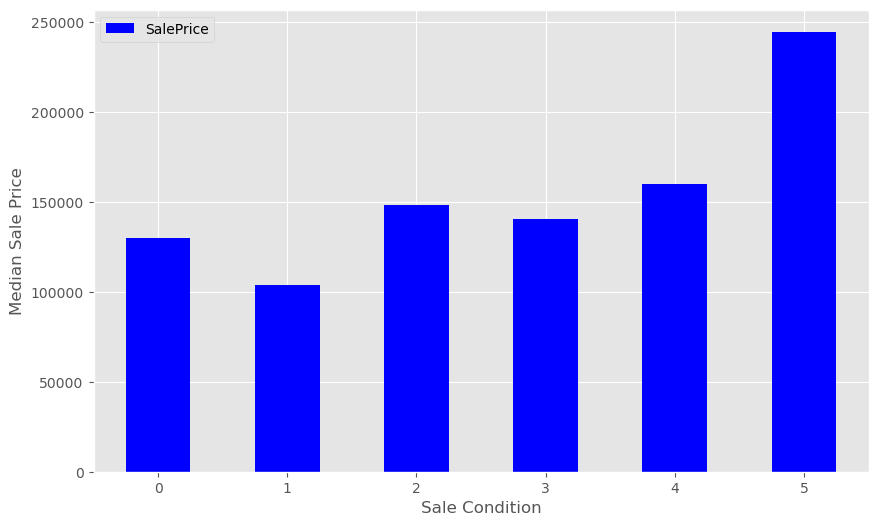

In [16]:
condition_pivot=train.pivot_table(index="SaleCondition", values="SalePrice", aggfunc=np.median)
condition_pivot.plot(kind="bar", color="blue")
plt.xlabel("Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

In [17]:
def encode(x): return 1 if x=="Partial" else 0
train["enc_condition"]=train.SaleCondition.apply(encode)
test["enc_condition"]=test.SaleCondition.apply(encode)


C:\Users\Ognjen\AppData\Local\Temp\ipykernel_19388\3916570236.py:1: FutureWarning: The provided callable <function median at 0x000002404365A700> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  condition_pivot=train.pivot_table(index="enc_condition", values="SalePrice", aggfunc=np.median)


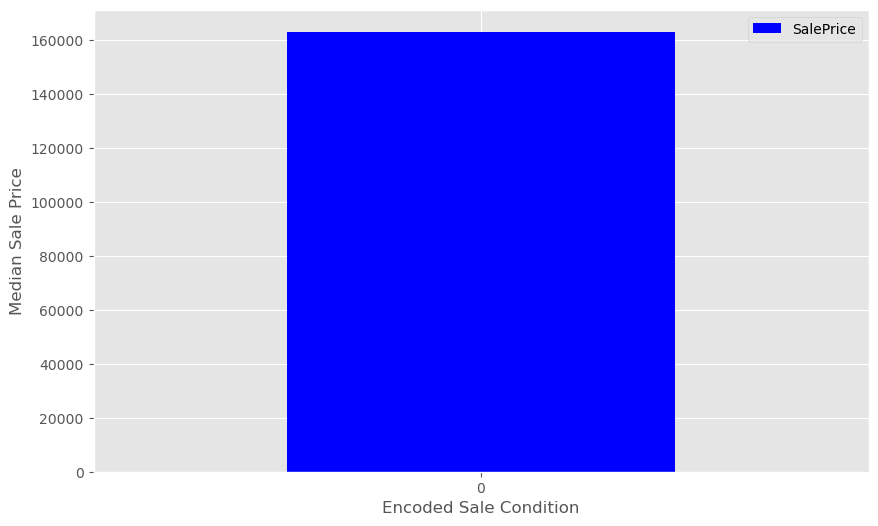

In [18]:
condition_pivot=train.pivot_table(index="enc_condition", values="SalePrice", aggfunc=np.median)
condition_pivot.plot(kind="bar", color="blue")
plt.xlabel("Encoded Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

In [19]:
data=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [20]:
print(sum(data.isnull().sum()!=0))

0


In [21]:
y=np.log(train.SalePrice)
X=data.drop(["SalePrice", "Id"], axis=1)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import linear_model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [26]:
lr=linear_model.LinearRegression()

In [27]:
model=lr.fit(X_train, y_train)

In [28]:
print("R**2: ", model.score(X_test, y_test))

R**2:  0.8957351549511541


Mean Squared Error:  0.016584317923015467


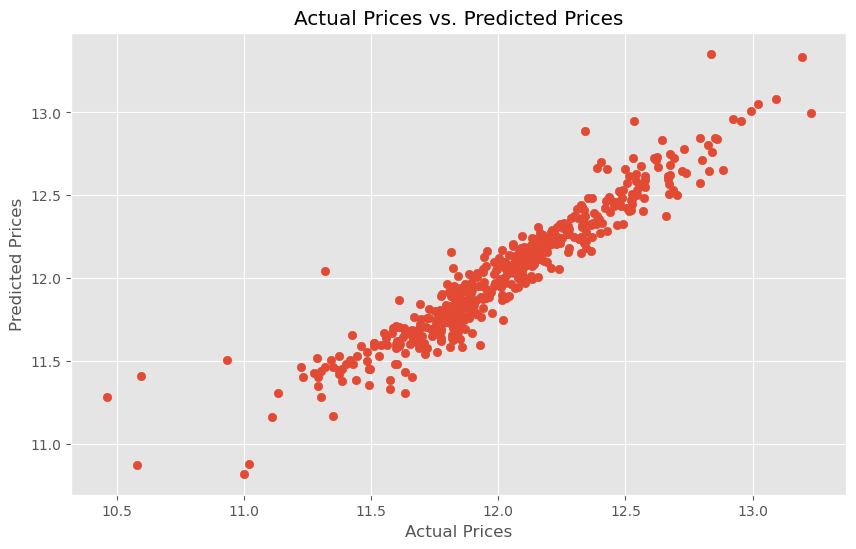

In [29]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Visualize the predicted vs. actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()